In [10]:
import pandas as pd 
import numpy as np
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv("./country_wise_latest.csv")
fg = pd.read_csv("./full_grouped.csv")

In [7]:
df.head()

Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1        Albania       4880     144       2745    1991        117           6   
2        Algeria      27973    1163      18837    7973        616           8   
3        Andorra        907      52        803      52         10           0   
4         Angola        950      41        242     667         18           1   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                3.50                  69.49   
1             63                2.95                  56.25   
2            749                4.16                  67.34   
3              0                5.73                  88.53   
4              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                    5.04                35526            737   
1                    5.25                 4171            709   
2                    6.17                23691           4282   
3                    6.48                  884             23   
4                   16.94                  749            201   

   1 week % increase             WHO Region  
0               2.07  Eastern Mediterranean  
1              17.00                 Europe  
2              18.07                 Africa  
3               2.60                 Europe  
4              26.84                 Africa

In [6]:
fg.head()

Date Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0  2020-01-22    Afghanistan          0       0          0       0          0   
1  2020-01-22        Albania          0       0          0       0          0   
2  2020-01-22        Algeria          0       0          0       0          0   
3  2020-01-22        Andorra          0       0          0       0          0   
4  2020-01-22         Angola          0       0          0       0          0   

   New deaths  New recovered             WHO Region  
0           0              0  Eastern Mediterranean  
1           0              0                 Europe  
2           0              0                 Africa  
3           0              0                 Europe  
4           0              0                 Africa

In [4]:
df.info()
fg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [9]:
df.sort_values(ascending=False , by=['Active']).head(3)


Country/Region  Confirmed  Deaths  Recovered   Active  New cases  \
173             US    4290259  148011    1325804  2816444      56336   
23          Brazil    2442375   87618    1846641   508116      23284   
79           India    1480073   33408     951166   495499      44457   

     New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
173        1076          27941                3.45                  30.90   
23          614          33728                3.59                  75.61   
79          637          33598                2.26                  64.26   

     Deaths / 100 Recovered  Confirmed last week  1 week change  \
173                   11.16              3834677         455582   
23                     4.74              2118646         323729   
79                     3.51              1155338         324735   

     1 week % increase       WHO Region  
173              11.88         Americas  
23               15.28         Americas  
79               28.11  South-East Asia

In [8]:
df.sort_values(ascending=False , by=['Deaths / 100 Cases','Confirmed']).head(5).sort_values(ascending=True , by=['Recovered / 100 Cases'])


Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
177  United Kingdom     301708   45844       1437  254427        688   
16          Belgium      66428    9822      17452   39154        402   
61           France     220352   30212      81212  108928       2551   
184           Yemen       1691     483        833     375         10   
85            Italy     246286   35112     198593   12581        168   

     New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
177           7              3               15.19                   0.48   
16            1             14               14.79                  26.27   
61           17            267               13.71                  36.86   
184           4             36               28.56                  49.26   
85            5            147               14.26                  80.64   

     Deaths / 100 Recovered  Confirmed last week  1 week change  \
177                 3190.26               296944           4764   
16                    56.28                64094           2334   
61                    37.20               214023           6329   
184                   57.98                 1619             72   
85                    17.68               244624           1662   

     1 week % increase             WHO Region  
177               1.60                 Europe  
16                3.64                 Europe  
61                2.96                 Europe  
184               4.45  Eastern Mediterranean  
85                0.68                 Europe

In [8]:
df.sort_values(ascending=False , by=['Confirmed','1 week % increase']).head(5)


Country/Region  Confirmed  Deaths  Recovered   Active  New cases  \
173             US    4290259  148011    1325804  2816444      56336   
23          Brazil    2442375   87618    1846641   508116      23284   
79           India    1480073   33408     951166   495499      44457   
138         Russia     816680   13334     602249   201097       5607   
154   South Africa     452529    7067     274925   170537       7096   

     New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
173        1076          27941                3.45                  30.90   
23          614          33728                3.59                  75.61   
79          637          33598                2.26                  64.26   
138          85           3077                1.63                  73.74   
154         298           9848                1.56                  60.75   

     Deaths / 100 Recovered  Confirmed last week  1 week change  \
173                   11.16              3834677         455582   
23                     4.74              2118646         323729   
79                     3.51              1155338         324735   
138                    2.21               776212          40468   
154                    2.57               373628          78901   

     1 week % increase       WHO Region  
173              11.88         Americas  
23               15.28         Americas  
79               28.11  South-East Asia  
138               5.21           Europe  
154              21.12           Africa

In [11]:
df.sort_values(ascending=False , by=['Recovered / 100 Cases']).head().sort_values(ascending=True , by=['Deaths','Confirmed']).head(5)


Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
75       Holy See         12       0         12       0          0   
49       Dominica         18       0         18       0          0   
69        Grenada         23       0         23       0          0   
78        Iceland       1854      10       1823      21          7   
48       Djibouti       5059      58       4977      24          9   

    New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
75           0              0                0.00                 100.00   
49           0              0                0.00                 100.00   
69           0              0                0.00                 100.00   
78           0              0                0.54                  98.33   
48           0             11                1.15                  98.38   

    Deaths / 100 Recovered  Confirmed last week  1 week change  \
75                    0.00                   12              0   
49                    0.00                   18              0   
69                    0.00                   23              0   
78                    0.55                 1839             15   
48                    1.17                 5020             39   

    1 week % increase             WHO Region  
75               0.00                 Europe  
49               0.00               Americas  
69               0.00               Americas  
78               0.82                 Europe  
48               0.78  Eastern Mediterranean

In [15]:
def plot_map(df, col):
    fig = px.choropleth(df, locations="Country/Region", locationmode='country names', 
                  color=col, hover_name="Country/Region", 
                  title=col, hover_data=[col], color_continuous_scale='sunset')
    fig.update_layout(margin=dict(l=60, r=60, t=50, b=50))
    fig.show()

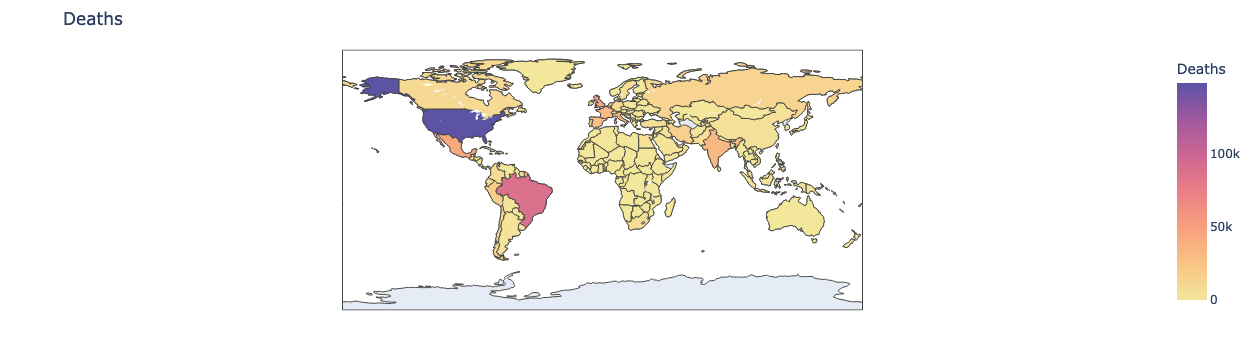

In [16]:
plot_map(df, 'Deaths')

In [27]:
df.sort_values('Confirmed').tail(10)

Country/Region  Confirmed  Deaths  Recovered   Active  New cases  \
81             Iran     293606   15912     255144    22550       2434   
177  United Kingdom     301708   45844       1437   254427        688   
35            Chile     347923    9187     319954    18782       2133   
132            Peru     389717   18418     272547    98752      13756   
111          Mexico     395489   44022     303810    47657       4973   
154    South Africa     452529    7067     274925   170537       7096   
138          Russia     816680   13334     602249   201097       5607   
79            India    1480073   33408     951166   495499      44457   
23           Brazil    2442375   87618    1846641   508116      23284   
173              US    4290259  148011    1325804  2816444      56336   

     New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
81          212           1931                5.42                  86.90   
177           7              3               15.19                   0.48   
35           75           1859                2.64                  91.96   
132         575           4697                4.73                  69.93   
111         342           8588               11.13                  76.82   
154         298           9848                1.56                  60.75   
138          85           3077                1.63                  73.74   
79          637          33598                2.26                  64.26   
23          614          33728                3.59                  75.61   
173        1076          27941                3.45                  30.90   

     Deaths / 100 Recovered  Confirmed last week  1 week change  \
81                     6.24               276202          17404   
177                 3190.26               296944           4764   
35                     2.87               333029          14894   
132                    6.76               357681          32036   
111                   14.49               349396          46093   
154                    2.57               373628          78901   
138                    2.21               776212          40468   
79                     3.51              1155338         324735   
23                     4.74              2118646         323729   
173                   11.16              3834677         455582   

     1 week % increase             WHO Region  
81                6.30  Eastern Mediterranean  
177               1.60                 Europe  
35                4.47               Americas  
132               8.96               Americas  
111              13.19               Americas  
154              21.12                 Africa  
138               5.21                 Europe  
79               28.11        South-East Asia  
23               15.28               Americas  
173              11.88               Americas

In [34]:
def plot_hbar(df, col, n, hover_data=[]):
    plot = px.bar(df.sort_values(col).tail(n), 
                 x=col, y="Country/Region", color='WHO Region',  
                 text=col, orientation='h', width=700, hover_data=hover_data,
                 color_discrete_sequence = px.colors.qualitative.Dark2)
    plot.update_layout(title=col, yaxis_categoryorder = 'total ascending',
                       uniformtext_minsize=8, uniformtext_mode='hide')
    plot.show()

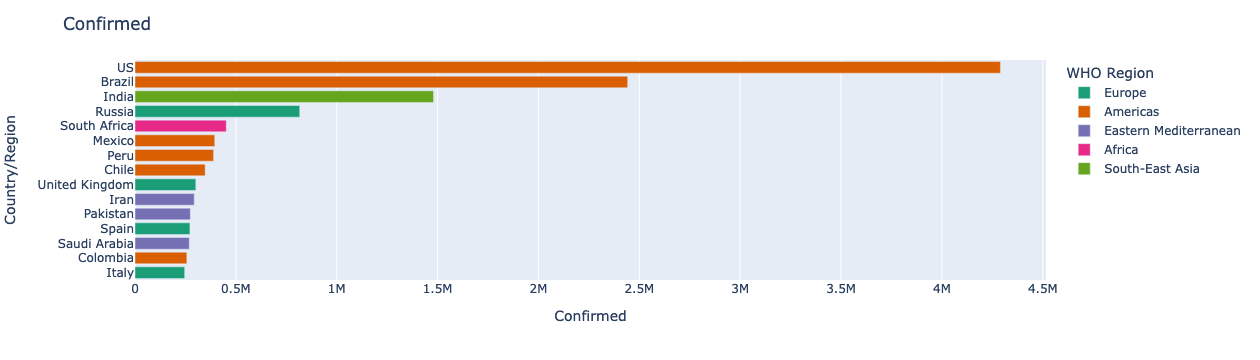

In [35]:
plot_hbar(df, 'Confirmed', 15)

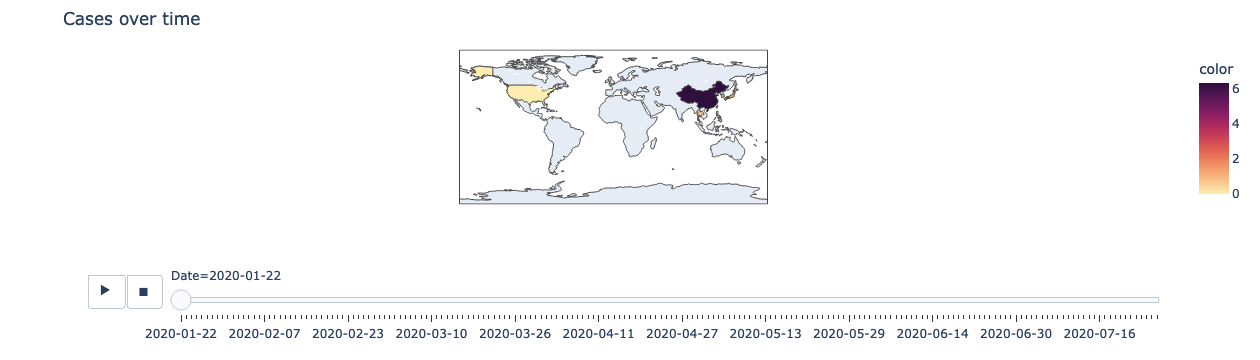

In [24]:
fig = px.choropleth(fg, locations="Country/Region", 
                    color=np.log(fg["Confirmed"]),
                    locationmode='country names', hover_name="Country/Region", 
                    animation_frame=fg["Date"],
                    title='Cases over time', color_continuous_scale=px.colors.sequential.matter)
fig.update_layout(margin=dict(l=60, r=60, t=50, b=50))
fig.show()

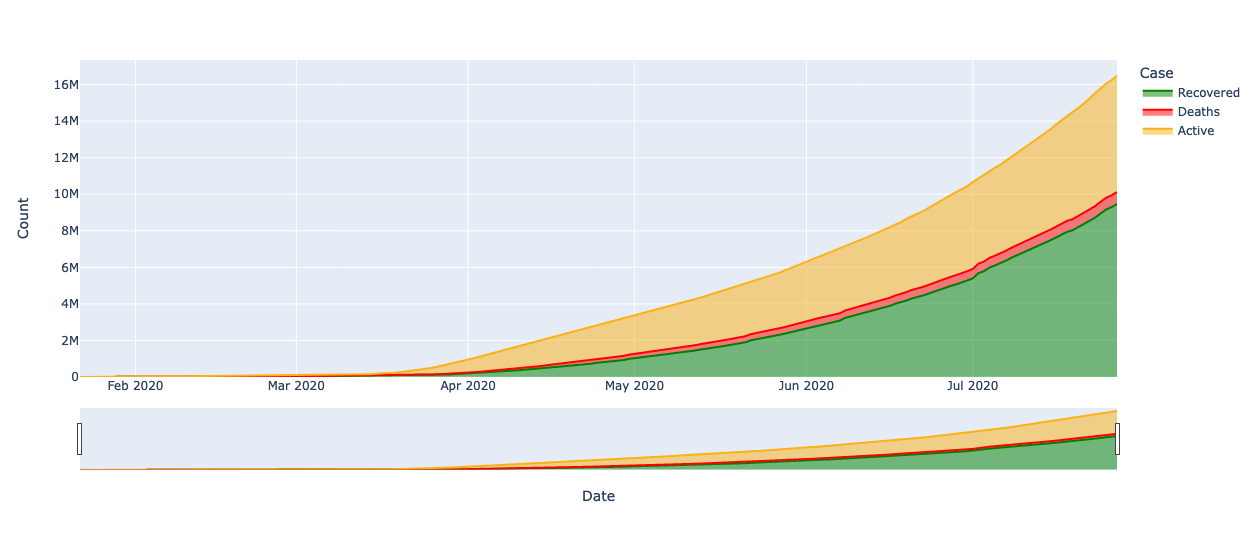

In [15]:
temp = fg.groupby('Date')[['Recovered', 'Deaths', 'Active']].sum().reset_index()
temp = temp.melt(id_vars="Date", value_vars=['Recovered', 'Deaths', 'Active'],
                 var_name='Case', value_name='Count')
fig = px.area(temp, x="Date", y="Count", color='Case', height=550, width=1000,
              color_discrete_sequence = ['#008000', '#ff0000', '#fbb117'])
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

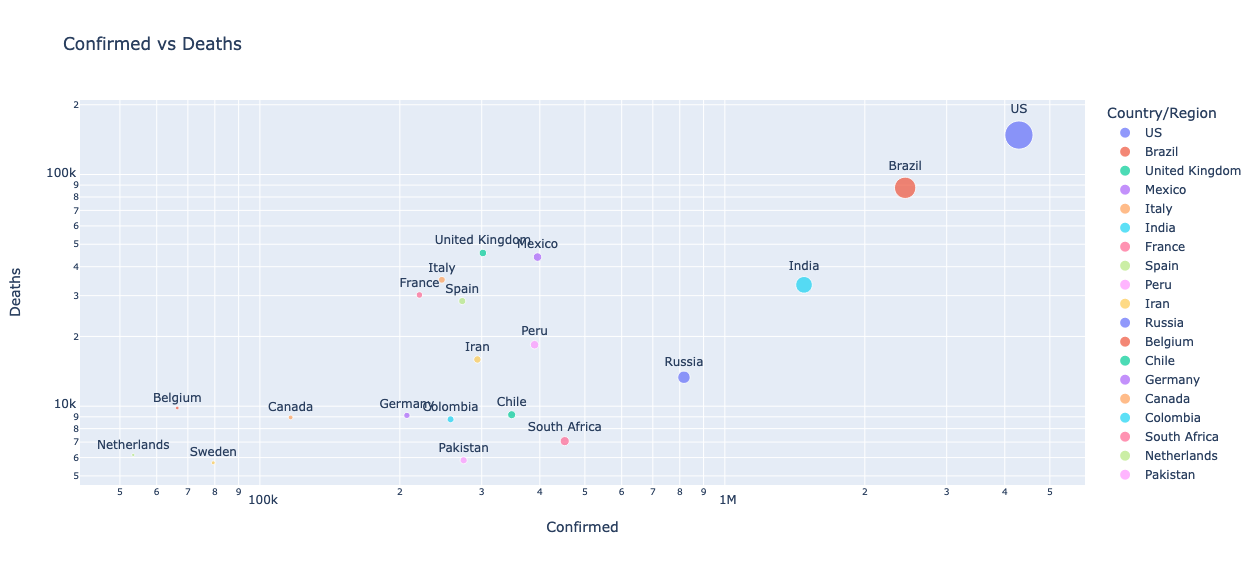

In [16]:
plot = px.scatter(df.sort_values('Deaths', ascending=False)[0:20], 
                 x='Confirmed', y='Deaths', color='Country/Region', size='Confirmed', 
                 height=565, text='Country/Region', log_x=True, log_y=True, 
                 title='Confirmed vs Deaths')
plot.update_traces(textposition='top center')
plot.show()

In [40]:
tm = px.treemap(df, path=["Country/Region"], values='Active', height=600, title='Active cases')
tm.data[0].textinfo = 'label+text+value'
tm.show()

In [18]:
plt.scatter(df['Deaths'],df['Recovered'])

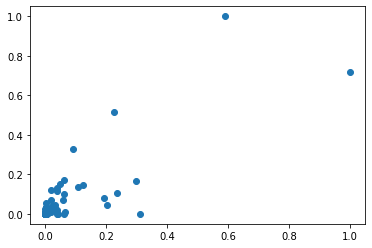

In [19]:
scaler = MinMaxScaler()
scaler.fit(df[['Deaths']])
df['Deaths'] = scaler.transform(df[['Deaths']])

scaler.fit(df[['Recovered']])
df['Recovered'] = scaler.transform(df[['Recovered']])
plt.scatter(df['Deaths'],df['Recovered'])

In [20]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Deaths','Recovered']])
df['cluster'] = y_predicted
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

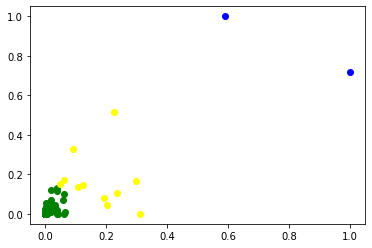

In [21]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]
plt.scatter(df0['Deaths'], df0['Recovered'], color='green')
plt.scatter(df1['Deaths'], df1['Recovered'], color='blue')
plt.scatter(df2['Deaths'], df2['Recovered'], color='yellow')



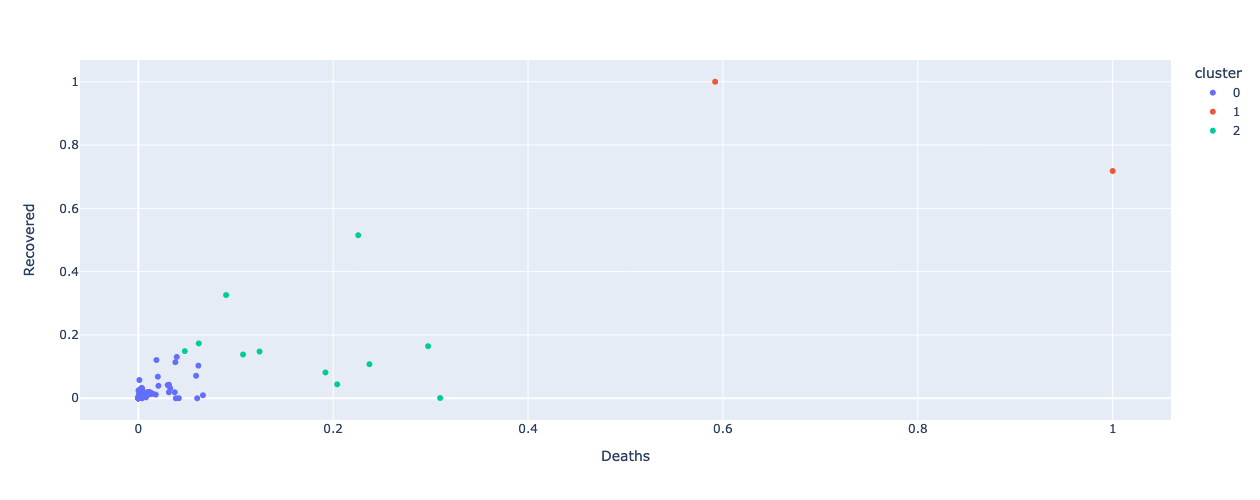

In [22]:
df=df.astype({'cluster':'object'})
fig = px.scatter(df, x='Deaths', y='Recovered', color='cluster', height=500, width=500)
fig.show()